In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm, shapiro

In [40]:
df_gliwice = pd.read_excel('data/Gliwice_poprawione.xls', index_col=0)
df_gliwice

,NO,NO2,NOx,PM10,PM2.5,SO2,cisnienie,kier,opad_atm,predk,prom,temp,wilg
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,0,1.154167,NaN,"-8,458",94.833333
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,0,1.939130,NaN,"-6,971",90.291667
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,0.008333,1.880952,NaN,"-5,500",90.458333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,0.016667,0.808696,NaN,"-8,371",89.166667


In [41]:
df_tychy = pd.read_excel('data/Tychy 24h 2007-2014.xlsx', header=3, skiprows=[4], index_col=0)
df_tychy

,NO,NO2,NOx,O3,PM10,SO2,cisnienie,kier,opad_atm,predk,prom,temp,wilg
2007-01-01,NaN,11.217391,NaN,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.956522,NaN,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.652174,NaN,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,11.956522,NaN,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,18.086957,NaN,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,5.818182,28.181818,36.863636,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,"-7,663",86.916667
2014-12-28,1.739130,17.695652,20.086957,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,"-6,154",82.750000
2014-12-29,2.130435,18.043478,20.956522,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,"-5,408",79.333333
2014-12-30,16.695652,29.869565,55.217391,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,"-8,054",77.083333


In [42]:
df_gliwice.dtypes

NO           float64
NO2          float64
NOx          float64
PM10         float64
PM2.5        float64
SO2          float64
cisnienie    float64
kier         float64
opad_atm      object
predk        float64
prom         float64
temp          object
wilg         float64
dtype: object

In [43]:
df_gliwice['opad_atm'] = df_gliwice['opad_atm'].str.replace(',', '.').astype(float)

In [44]:
df_gliwice['temp'] = df_gliwice['temp'].str.replace(',', '.').astype(float)

In [45]:
df_tychy.dtypes

NO           float64
NO2          float64
NOx          float64
O3           float64
PM10         float64
SO2          float64
cisnienie    float64
kier         float64
opad_atm     float64
predk        float64
prom         float64
temp          object
wilg         float64
dtype: object

In [46]:
df_tychy['temp'] = df_tychy['temp'].str.replace(',', '.').astype(float)

In [47]:
df_gliwice_named = df_gliwice.copy()
df_gliwice_named.columns = df_gliwice_named.columns.map(lambda x: x + '_Gliwice')
df_gliwice_named

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,prom_Gliwice,temp_Gliwice,wilg_Gliwice
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,NaN,1.154167,NaN,-8.458,94.833333
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,NaN,-6.971,90.291667
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,NaN,-5.500,90.458333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,NaN,-8.371,89.166667


In [48]:
df_tychy_named = df_tychy.copy()
df_tychy_named.columns = df_tychy_named.columns.map(lambda x: x + '_Tychy')
df_tychy_named

,NO_Tychy,NO2_Tychy,NOx_Tychy,O3_Tychy,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy
2007-01-01,NaN,11.217391,NaN,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.956522,NaN,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.652174,NaN,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,11.956522,NaN,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,18.086957,NaN,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,5.818182,28.181818,36.863636,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667
2014-12-28,1.739130,17.695652,20.086957,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000
2014-12-29,2.130435,18.043478,20.956522,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333
2014-12-30,16.695652,29.869565,55.217391,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333


In [49]:
df = pd.merge(df_gliwice_named, df_tychy_named, left_index=True, right_index=True)
df

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,...,O3_Tychy,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,...,50.416667,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,...,42.652174,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,...,33.608696,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,...,44.782609,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,...,38.739130,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.708333,101.0,54.173913,986.083333,117.875000,NaN,1.154167,...,NaN,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,...,NaN,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,...,NaN,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,...,NaN,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333


In [50]:
df.index = pd.to_datetime(df.index)

In [51]:
def show_stats(dataframe):
    return pd.DataFrame({
        'Ważne obserwacje': (~dataframe.isna()).sum(),
        '% Ważnych obserwacji': round((~dataframe.isna()).sum() / len(dataframe) * 100, 1),
        'Średnia': dataframe.mean(),
        'Mediana': dataframe.median(),
        'Minimum': dataframe.min(),
        'Maksimum': dataframe.max(),
        'Odchylenie standardowe': dataframe.std()
    })

stats = show_stats(df)
stats

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
NO_Gliwice,2124,74.0,11.184276,4.800395,0.000000,202.565217,16.936140
NO2_Gliwice,2797,97.4,25.326198,23.565217,2.869565,89.086957,13.013892
NOx_Gliwice,2452,85.4,42.696769,31.978261,3.304348,369.782609,36.409990
PM10_Gliwice,2508,87.4,45.938730,36.062500,6.695652,344.958333,35.097714
PM2.5_Gliwice,1738,60.5,36.603855,26.000000,2.500000,256.000000,32.937656
SO2_Gliwice,2693,93.8,13.128484,8.217391,1.391304,125.043478,14.176684
cisnienie_Gliwice,1423,49.6,986.236537,986.291667,955.833333,1007.500000,7.655227
kier_Gliwice,1751,61.0,187.352009,191.333333,0.408333,340.916667,73.062782
opad_atm_Gliwice,1,0.0,0.000000,-0.000000,-0.000000,-0.000000,NaN
predk_Gliwice,1445,50.3,1.100144,0.960870,0.216667,5.416667,0.586203


In [52]:
stats[stats['% Ważnych obserwacji'] > 85]

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
NO2_Gliwice,2797,97.4,25.326198,23.565217,2.869565,89.086957,13.013892
NOx_Gliwice,2452,85.4,42.696769,31.978261,3.304348,369.782609,36.409990
PM10_Gliwice,2508,87.4,45.938730,36.062500,6.695652,344.958333,35.097714
SO2_Gliwice,2693,93.8,13.128484,8.217391,1.391304,125.043478,14.176684
NO2_Tychy,2670,93.0,25.084916,22.956522,5.652174,95.000000,11.253725
NOx_Tychy,2450,85.3,44.178931,32.804348,7.086957,353.869565,36.381298
PM10_Tychy,2657,92.5,40.657366,31.541667,5.166667,417.208333,32.513401
SO2_Tychy,2828,98.5,16.335227,10.913043,1.695652,175.608696,16.106226


In [53]:
cols_gliwice = [
    'NO_Gliwice',
    'NO2_Gliwice',
    'NOx_Gliwice',
    'PM10_Gliwice',
    'PM2.5_Gliwice',
    'SO2_Gliwice',
    'cisnienie_Gliwice',
    'kier_Gliwice',
    'opad_atm_Gliwice',
    'predk_Gliwice',
    'prom_Gliwice',
    'temp_Gliwice',
    'wilg_Gliwice'
]

cols_tychy = [
    'NO_Tychy',
    'NO2_Tychy',
    'NOx_Tychy',
    'O3_Tychy',
    'PM10_Tychy',
    'SO2_Tychy',
    'cisnienie_Tychy',
    'kier_Tychy',
    'opad_atm_Tychy',
    'predk_Tychy',
    'prom_Tychy',
    'temp_Tychy',
    'wilg_Tychy'
]

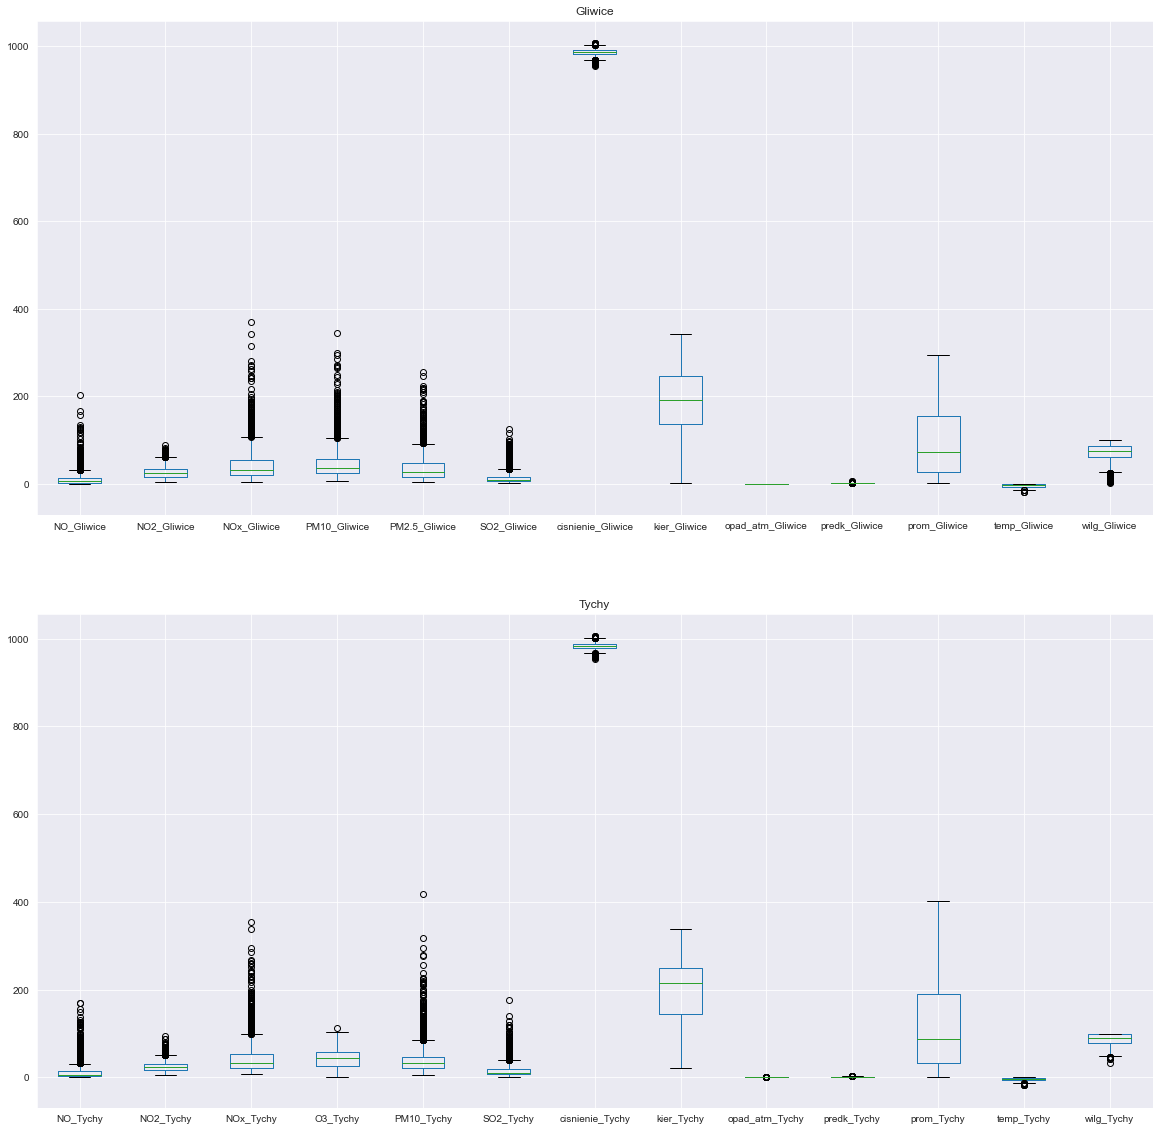

In [54]:
fig, axes = plt.subplots(2)

fig.set_size_inches(20, 20)

df[cols_gliwice].boxplot(ax=axes[0])
axes[0].set_title('Gliwice')
df[cols_tychy].boxplot(ax=axes[1])
axes[1].set_title('Tychy')
plt.show()

In [55]:
to_check = ['PM10', 'SO2']

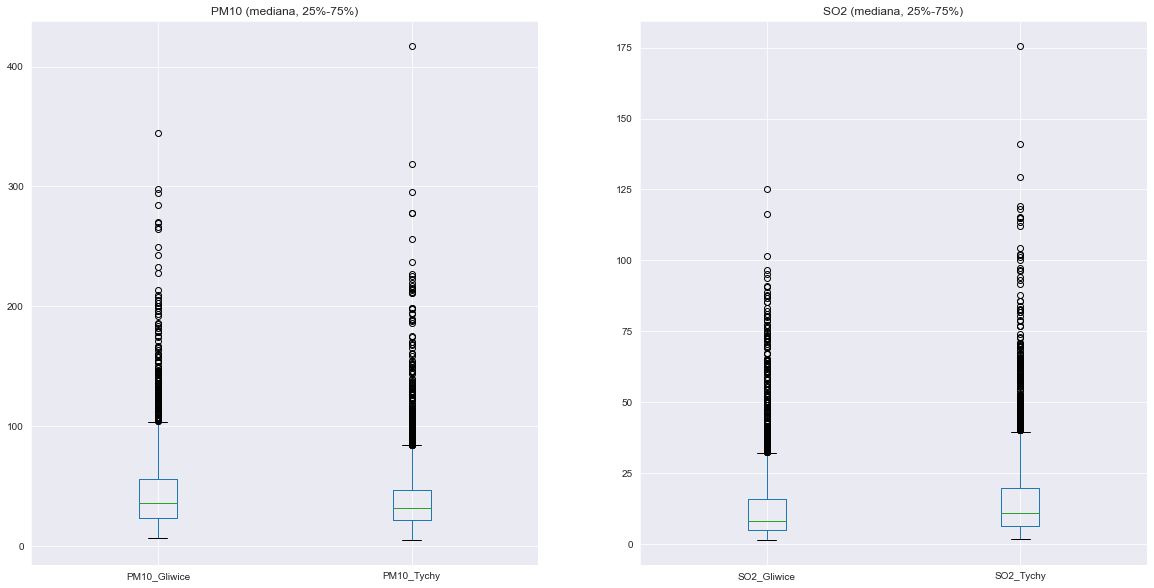

In [56]:
shared_variables = to_check
def show_boxplots():
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10 * 2, 10)

    for i, shared_variable in enumerate(shared_variables):
        cols = [shared_variable + '_Gliwice', shared_variable + '_Tychy']
        ax = axes[i]
        df[cols].boxplot(ax=ax)
        ax.set_title(f'{shared_variable} (mediana, 25%-75%)')
    plt.show()

show_boxplots()

In [57]:
def show_histogram(variable: pd.Series):
    variable = variable.dropna()

    plt.figure(figsize=(12, 8))
    mu, sd = norm.fit(variable)
    sns.histplot(variable, bins=40, stat='density')
    plt.ylabel('Gęstość')

    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 100)
    sns.lineplot(x=x, y=norm.pdf(x, mu, sd), color='red')
    plt.xlim(0)

    plt.show()
    p = shapiro(variable).pvalue
    print(p, p > 0.05)


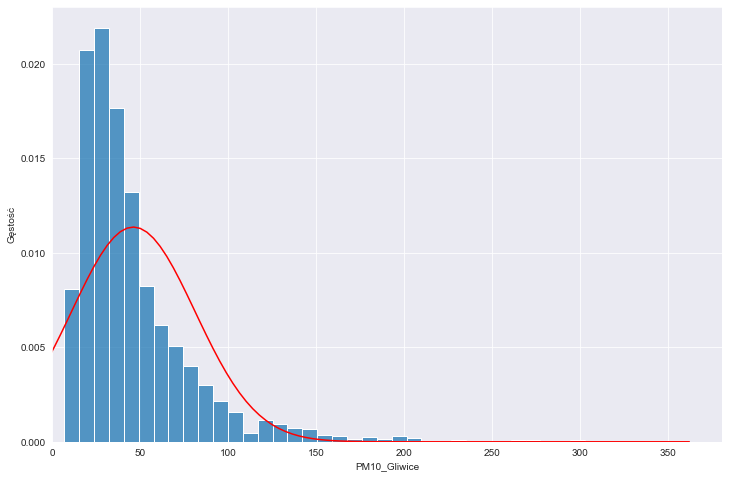

0.0 False


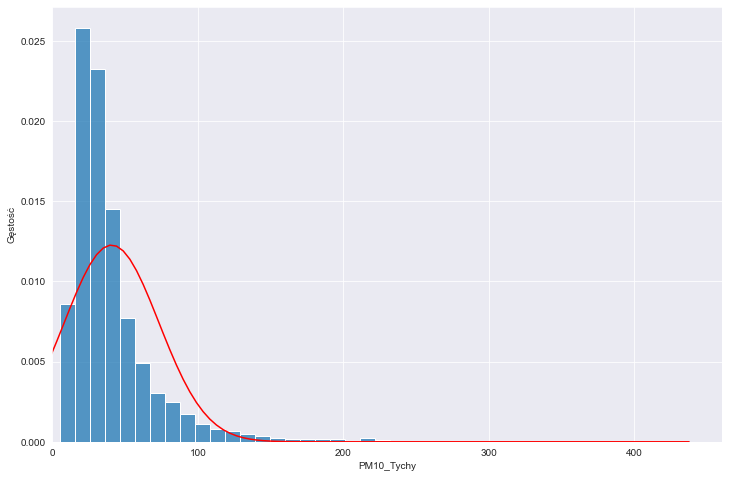

0.0 False


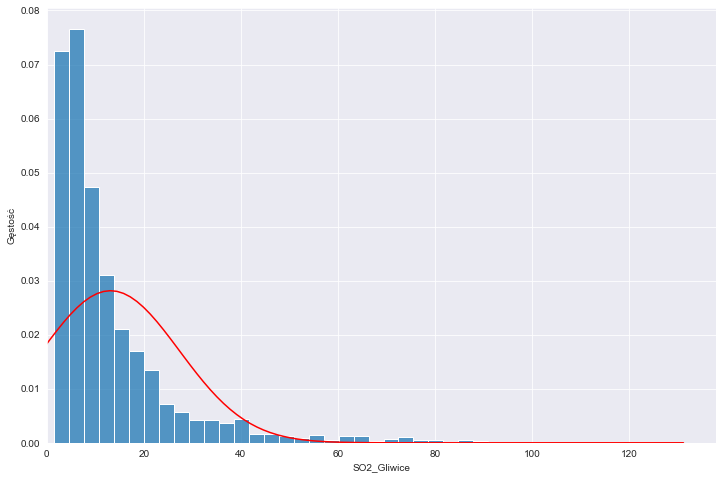

0.0 False


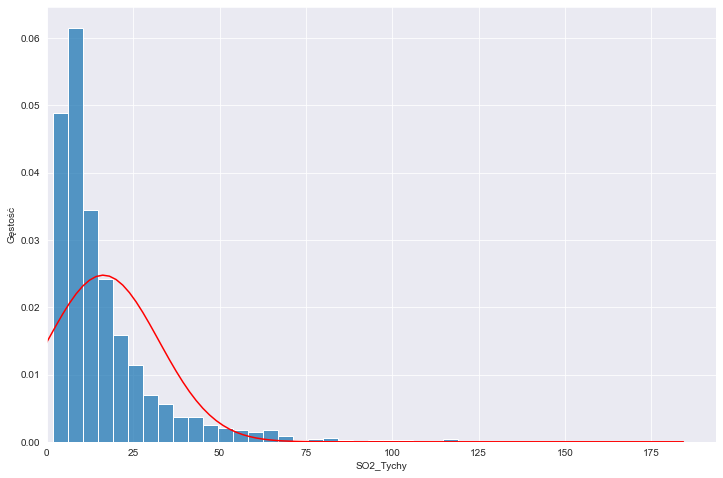

0.0 False


In [58]:
cols = ['PM10_Gliwice', 'PM10_Tychy', 'SO2_Gliwice', 'SO2_Tychy']
for col in cols:
    show_histogram(df[col])

In [59]:
q = 0.96
df[df > df.quantile(q)][cols].count().T

PM10_Gliwice    101
PM10_Tychy      107
SO2_Gliwice     108
SO2_Tychy       114
dtype: int64

In [60]:
df[df > df.quantile(q)][cols].count().T / df[cols].count()

PM10_Gliwice    0.040271
PM10_Tychy      0.040271
SO2_Gliwice     0.040104
SO2_Tychy       0.040311
dtype: float64

In [61]:
df[df[cols] > df[cols].quantile(q)][cols] = df[cols].quantile(q)

for col in cols:
    quantile = df[col].quantile(q)
    df.loc[df[col] > quantile, col] = quantile

In [62]:
show_stats(df[cols])

,Ważne obserwacje,% Ważnych obserwacji,Średnia,Mediana,Minimum,Maksimum,Odchylenie standardowe
PM10_Gliwice,2508,87.4,44.218136,36.062500,6.695652,124.375072,28.286501
PM10_Tychy,2657,92.5,38.678739,31.541667,5.166667,107.781667,24.132115
SO2_Gliwice,2693,93.8,12.308098,8.217391,1.391304,45.102292,11.007798
SO2_Tychy,2828,98.5,15.476309,10.913043,1.695652,52.163478,12.674987


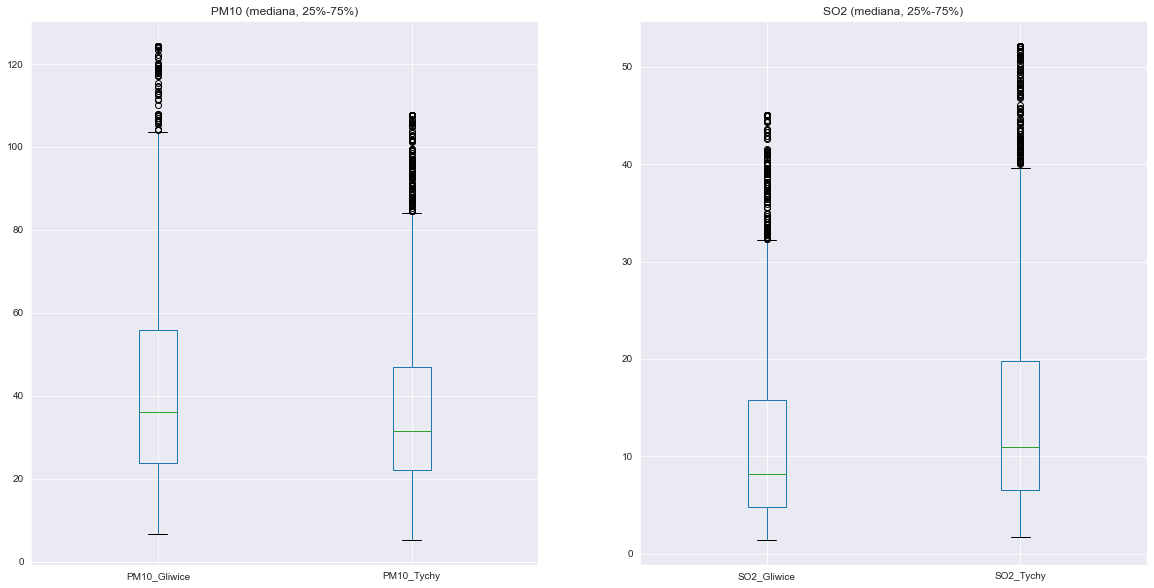

In [63]:
show_boxplots()

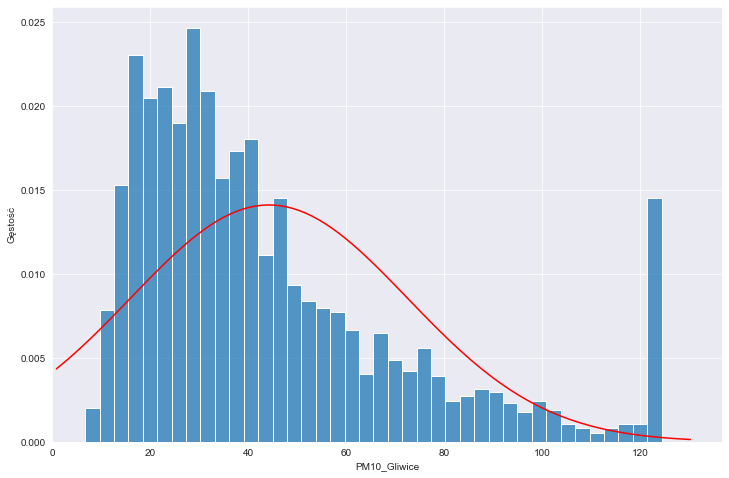

2.9161021042599443e-42 False


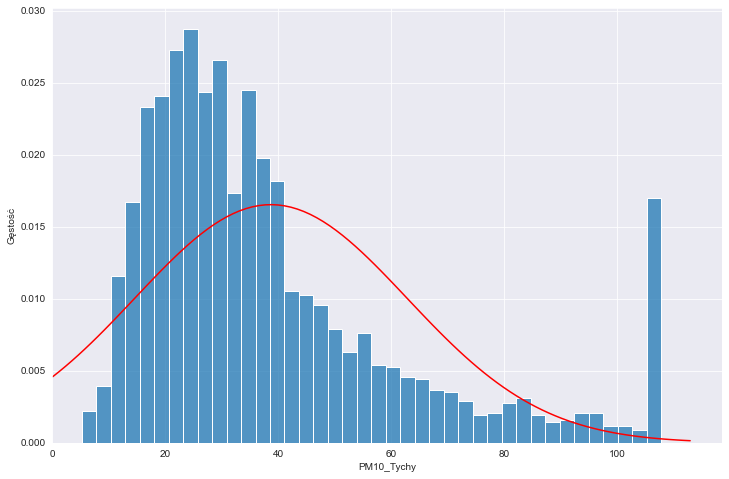

8.407790785948902e-45 False


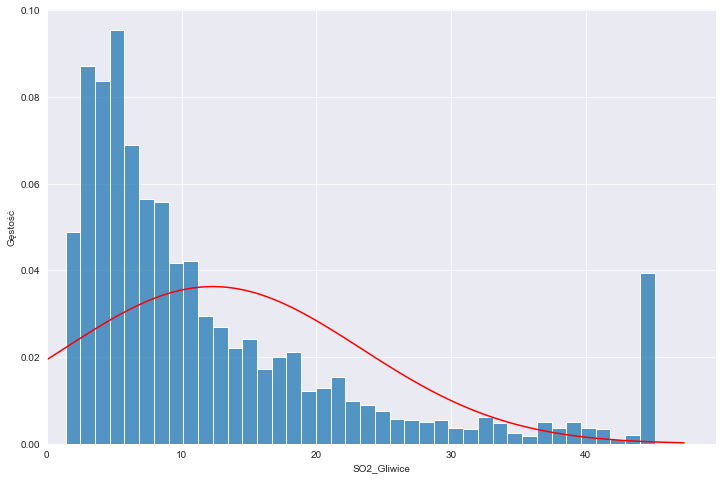

0.0 False


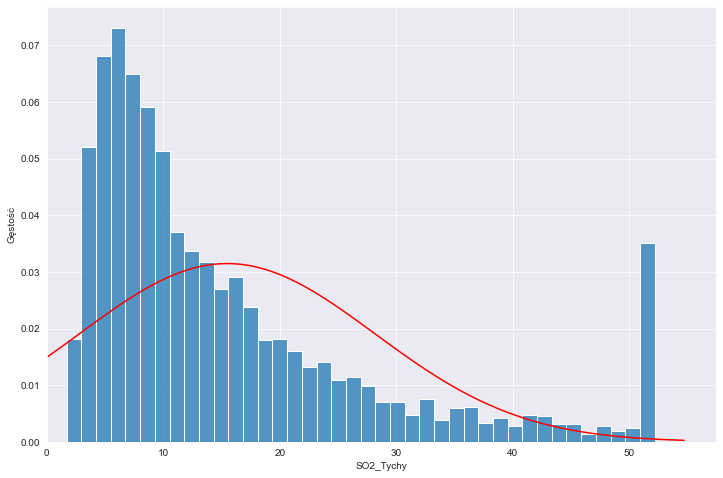

0.0 False


In [64]:
for col in cols:
    show_histogram(df[col])

In [65]:
from datetime import datetime, date

Y = 2000
seasons = [('zima', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('wiosna', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('lato', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('jesień', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('zima', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(d):
    if isinstance(d, datetime):
        d = d.date()
    d = d.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= d <= end)

df['Pora roku'] = df.index.map(get_season)
df

,NO_Gliwice,NO2_Gliwice,NOx_Gliwice,PM10_Gliwice,PM2.5_Gliwice,SO2_Gliwice,cisnienie_Gliwice,kier_Gliwice,opad_atm_Gliwice,predk_Gliwice,...,PM10_Tychy,SO2_Tychy,cisnienie_Tychy,kier_Tychy,opad_atm_Tychy,predk_Tychy,prom_Tychy,temp_Tychy,wilg_Tychy,Pora roku
2007-01-01,NaN,9.521739,NaN,14.666667,NaN,4.000000,NaN,NaN,NaN,NaN,...,10.125000,9.608696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-02,NaN,17.347826,NaN,22.291667,NaN,NaN,NaN,NaN,NaN,NaN,...,17.291667,9.869565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-03,NaN,17.476190,NaN,17.217391,NaN,2.750000,NaN,NaN,NaN,NaN,...,18.583333,8.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-04,NaN,20.047619,NaN,13.333333,NaN,10.952381,NaN,NaN,NaN,NaN,...,8.333333,8.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
2007-01-05,NaN,13.565217,NaN,13.791667,NaN,3.260870,NaN,NaN,NaN,NaN,...,17.625000,13.826087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,14.347826,26.782609,49.045455,124.375072,101.0,45.102292,986.083333,117.875000,NaN,1.154167,...,55.875000,38.363636,984.541667,NaN,0.000000,NaN,14.416667,-7.663,86.916667,zima
2014-12-28,2.272727,10.000000,13.095238,53.500000,38.0,24.217391,987.583333,224.521739,NaN,1.939130,...,49.000000,19.652174,985.625000,NaN,0.000000,NaN,10.666667,-6.154,82.750000,zima
2014-12-29,2.666667,8.272727,12.684211,36.625000,27.0,12.863636,994.750000,307.666667,NaN,1.880952,...,41.083333,13.000000,992.916667,NaN,0.000000,NaN,14.333333,-5.408,79.333333,zima
2014-12-30,16.478261,16.739130,41.782609,67.142857,83.0,24.391304,1001.541667,253.260870,NaN,0.808696,...,68.500000,23.347826,999.958333,NaN,0.000000,NaN,27.708333,-8.054,77.083333,zima
